# 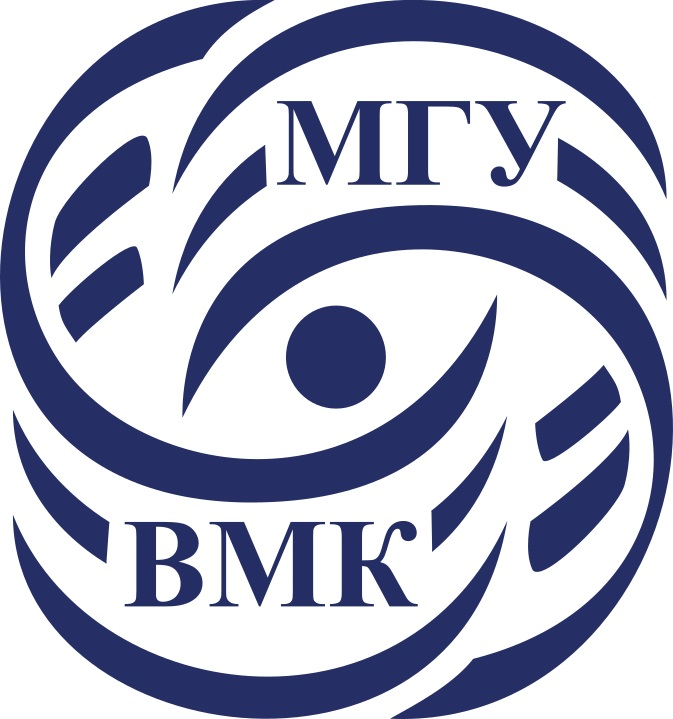

# Машинное обучение. ВМК МГУ

# Практическое задание 4: Линейные модели: классификация

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

---

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 30 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [70]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: c:\Users\user\3_cours\ML_3_cours\7_hometask\requirements_2024_25_for_colab_small.txt

  0%|          | 0.00/375 [00:00<?, ?B/s]
100%|██████████| 375/375 [00:00<?, ?B/s] 


Проверим версию библиотеки:

In [71]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 0. Юнит-тестирование (3 балла)

Ниже импортируются классы, которые необходимо реализовать самостоятельно. Правильность реализации проверяется юнит-тестами. Максимально за юнит-тесты можно получить $10$ баллов. Шаблон для классов находится в отдельной вкладке.

**После того, как вы локально реализовали и протестировали модуль Task.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

**<font color=red>Обратите внимание!</font>** Если Ваша реализация счётчиков работает очень долго (скажем, больше 2 секунд: можно посмотреть в системе, сколько оно тестировалось), то вероятнее всего, Вы плохо векторизовали код, и ваш ноутбук, перед вопросом 16, будет долго работать. Попробуйте использовать `np.vectorize`



In [73]:
from Task import MyOneHotEncoder, SimpleCounterEncoder, FoldCounters

## Часть 1. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$

где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-[\langle w, x \rangle + b]}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

Рассмотрим пару модельных примеров, в которых целевая переменная $y$ линейно зависит от двух независимых величин $x_1$ и $x_2$, плюс случайный шум.

In [74]:
np.random.seed(1)
X = np.random.randn(100, 2)
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

Обучим логистическую регрессию, двумя методами LBFGS и Newton-CG. Для простоты восприятия, можно считать, что первый похож на градиентный спуск, а второй на метод Ньютона

In [75]:
from sklearn.linear_model import LogisticRegression

clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

In [76]:
x1 = np.linspace(0.5, 3.5, 1000)
x2 = np.linspace(-0.5, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)

def loss(X1, X2, X, Y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    p = sigmoid(X1[None] * X[:, 0, None, None] + X2[None] * X[:, 1, None, None]) # 100, 200, 200
    return -np.sum(Y[:, None, None] * np.log(p) + (1 - Y[:, None, None]) * np.log(1 - p), axis=0) + 0.5 * (X1**2 + X2**2)

Z = loss(X1, X2, X, Y)

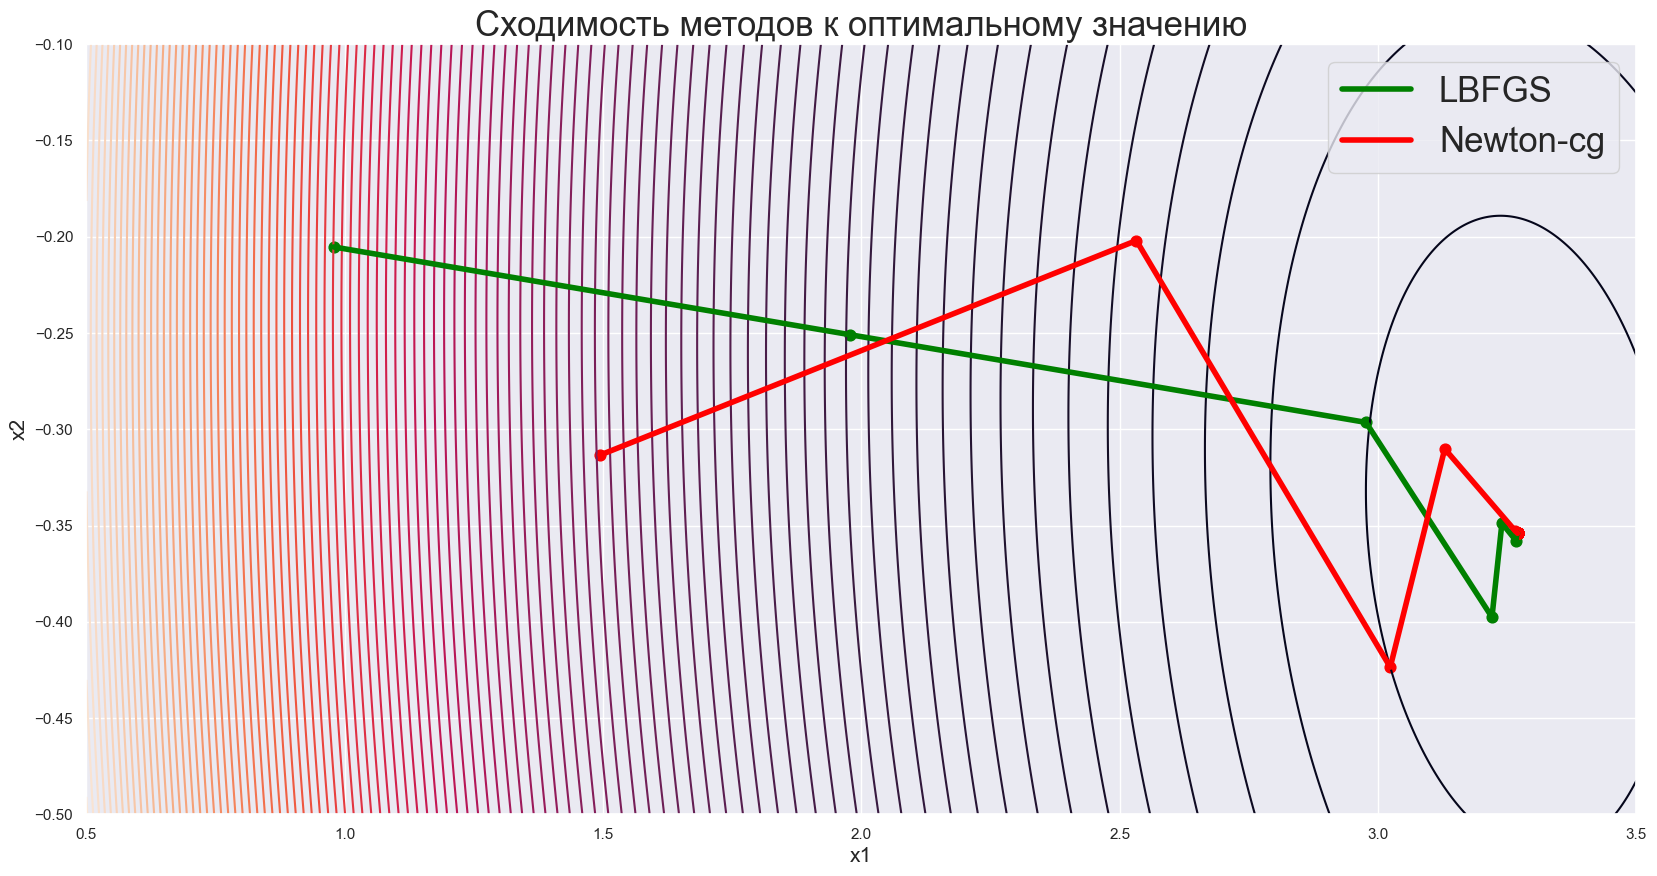

In [77]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

Рассмотрим второй пример. **Внимание**, здесь $x_2$ уже из другого распределения!

In [78]:
np.random.seed(1)
X = np.hstack((np.random.randn(100, 1), np.random.uniform(7, 12, (100, 1))))
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

In [79]:
clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

x1 = np.linspace(0, 3.5, 1000)
x2 = np.linspace(0.01, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = loss(X1, X2, X, Y)

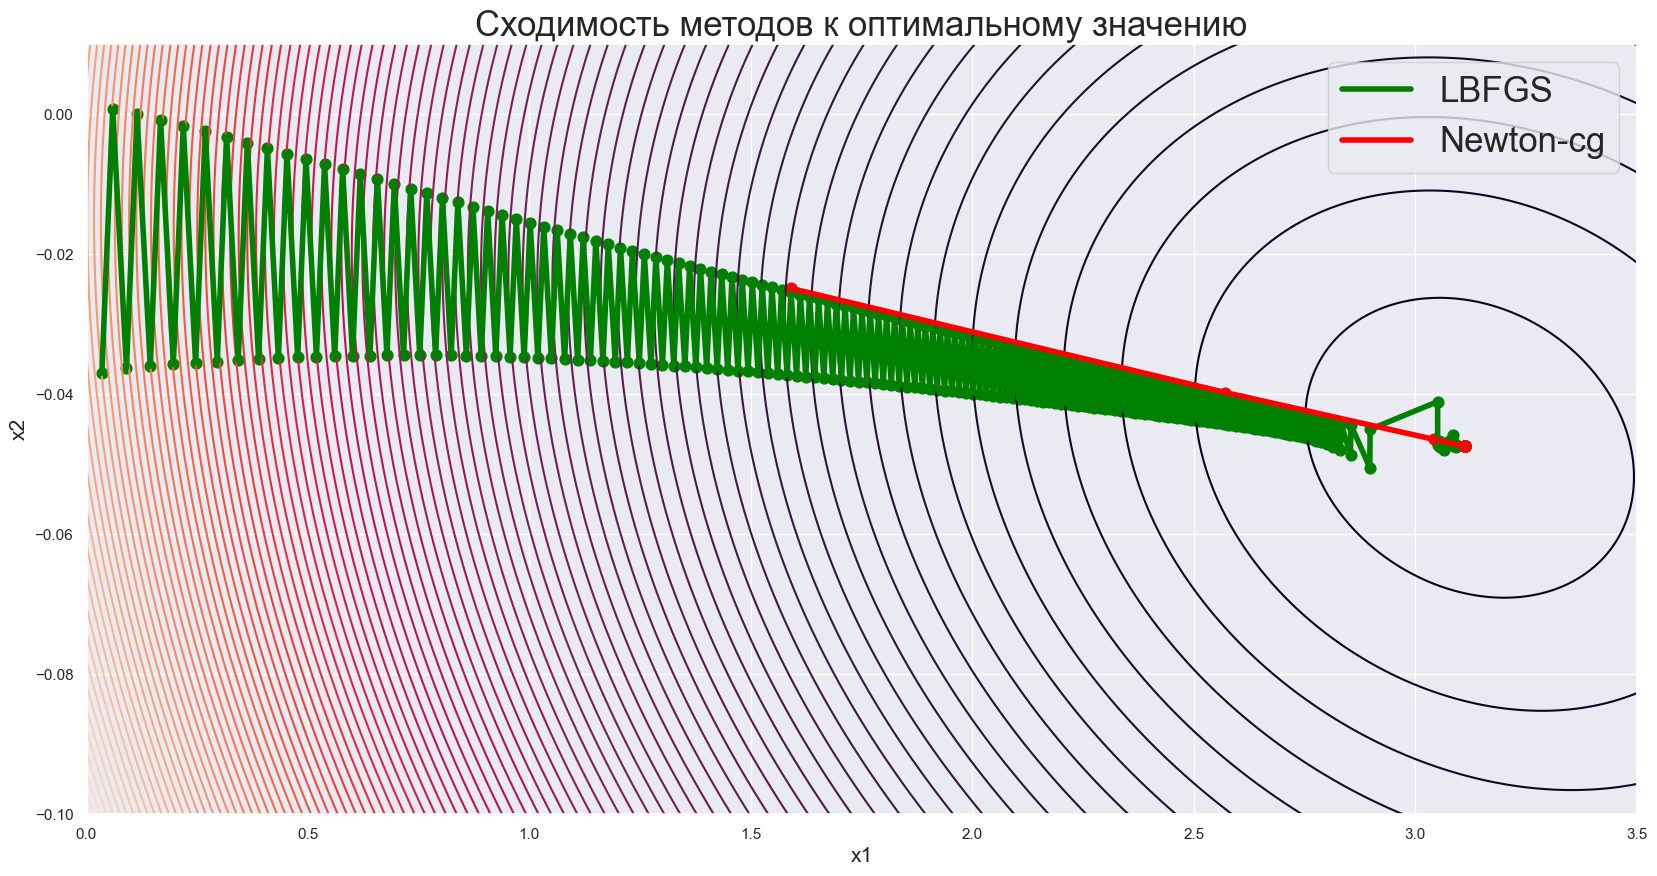

In [80]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

## <font color='DarkOrange'> **Задание 1 [0.7 балла]** </font>

Как видим, метод LBFGS плохо работает на неотмасштабированных данных. Это общее свойство всех методов первого порядка (т.е. использующих только первую производную). Ньютоновские же методы хорошо справляются с подобными ситуациями. В таком случае, почему LBFGS является методом по умолчанию, а не Newton-CG?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

1. LBFGS не требует хранения и обращения больших матриц, что делает его более эффективным с точки зрения использования памяти, особенно для больших наборов данных.

2. LBFGS обычно хорошо работает для широкого диапазона задач оптимизации, в то время как ньютоновские методы могут быть чрезмерно чувствительны к настройкам гиперпараметров, таких как выбор коэффициента регуляризации.

-----------
<font color="white" style="opacity:0.2023"></font>

Сейчас мы намеренно сгенерируем случайные данные с ошибкой.

In [81]:
X1 = []
X2 = []

for i in range(100):
    np.random.seed(1)
    x1 = np.random.uniform(0, 5)
    x2 = np.random.uniform(0, 5)
    X1.append(x1)
    X2.append(x2)

X1 = np.array(X1)
X2 = np.array(X2)
X = np.hstack((X1[:, None], X2[:, None]))

Y = []

for i in range(100):
    p = 1 / (1 + np.exp(-(X1[i] + X2[i] - 5)))
    y = np.random.choice([0, 1], p = [1 - p, p])
    Y.append(y)

Y = np.array(Y)

В этом код генерируется $100$ одинаковых примеров. Только метки классов отличаются.

## <font color='DarkOrange'> **Задание 2 [0.35 балла]** </font>

Почему в этом коде генерируется $100$ одинаковых примеров, хотя используется random.seed?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>
Потому что обновление seed происходит каждый шаг цикла

-----------
<font color="white" style="opacity:0.2023"></font>

Поскольку все записи у нас идентичны, то каждому объекту обучающей выборки логистическая регрессия предскажет одинаковую вероятность принадлежности к классу $1$.

## <font color='DarkOrange'> **Задание 3 [1.4 балла]** </font>

Какую вероятность принадлежности к классу $1$ предскажет логистическая регрессия в этом случае?

<font color='LightSteelBlue'>**Замечание**</font> В качестве ответа подразумевается некий общий способ получения этого числа помимо прямого обучения логистической регрессии.

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Если в обучающем наборе данных все записи идентичны, логистическая регрессия будет выдавать одинаковую вероятность для каждого объекта. В таких условиях модель не сможет определить значимые веса для признаков, так как отсутствует необходимая вариативность данных для обучения.

В этом случае предсказанная моделью вероятность будет равна отношению количества объектов положительного класса к общему количеству объектов. Это происходит потому, что модель фактически сводится к простой гипотезе, где веса признаков стремятся к нулю, так как признаки не предоставляют информации о целевой переменной. Таким образом, предсказания будут основаны исключительно на базовой вероятности класса.

Следовательно, если в наборе данных присутствует n идентичных объектов, из которых k относятся к классу 1, предсказанная вероятность принадлежности к классу 1 будет равна k / n.

-----------
<font color="white" style="opacity:0.2023"></font>

## Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день. Тот же набор мы рассматривали в базовой части

Для начала, скачаем данные

In [82]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

Downloading...
From: https://drive.google.com/uc?id=1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe
To: c:\Users\user\3_cours\ML_3_cours\7_hometask\weatherAUS.csv

  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  4%|▎         | 524k/14.1M [00:00<00:16, 822kB/s]
  7%|▋         | 1.05M/14.1M [00:00<00:08, 1.57MB/s]
 11%|█         | 1.57M/14.1M [00:00<00:05, 2.14MB/s]
 15%|█▍        | 2.10M/14.1M [00:01<00:04, 2.51MB/s]
 19%|█▊        | 2.62M/14.1M [00:01<00:04, 2.85MB/s]
 22%|██▏       | 3.15M/14.1M [00:01<00:03, 3.19MB/s]
 30%|██▉       | 4.19M/14.1M [00:01<00:02, 3.73MB/s]
 33%|███▎      | 4.72M/14.1M [00:01<00:02, 4.02MB/s]
 37%|███▋      | 5.24M/14.1M [00:01<00:02, 4.14MB/s]
 41%|████      | 5.77M/14.1M [00:01<00:01, 4.26MB/s]
 48%|████▊     | 6.82M/14.1M [00:02<00:01, 4.77MB/s]
 56%|█████▌    | 7.86M/14.1M [00:02<00:01, 4.99MB/s]
 60%|█████▉    | 8.39M/14.1M [00:02<00:01, 4.90MB/s]
 67%|██████▋   | 9.44M/14.1M [00:02<00:00, 5.08MB/s]
 74%|███████▍  | 10.5M/14.1M [00:02<00:00, 5.29MB/s]
 82%|████████

In [83]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Извлечём немного информации из набора данных

In [84]:
df.shape

(145460, 23)

In [85]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [86]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [87]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [89]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [93]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [94]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [95]:
len(numeric_features)

17

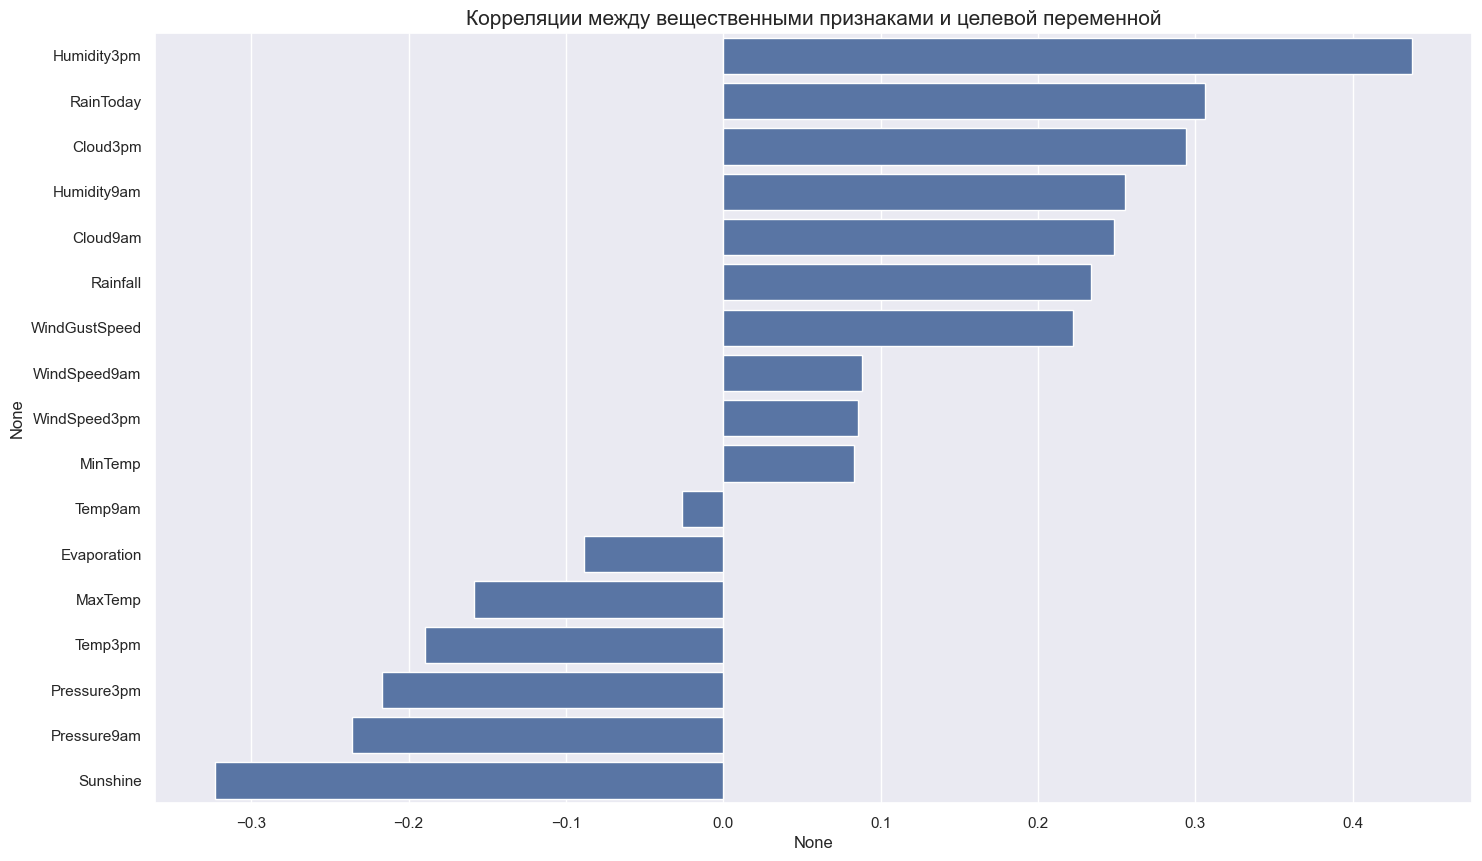

In [96]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [97]:
from sklearn.metrics import log_loss, roc_auc_score

In [98]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [99]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3635
Train logloss = 0.3695
Test roc auc score = 0.8604
Train roc auc score = 0.8564


### <font color='DarkOrange'> **Задание 4 [0.35 балла]** </font>

Сколько итераций понадобилось для обучения логистической регрессии?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> 843

In [100]:
#Ваш ответ
model.n_iter_[0]

843

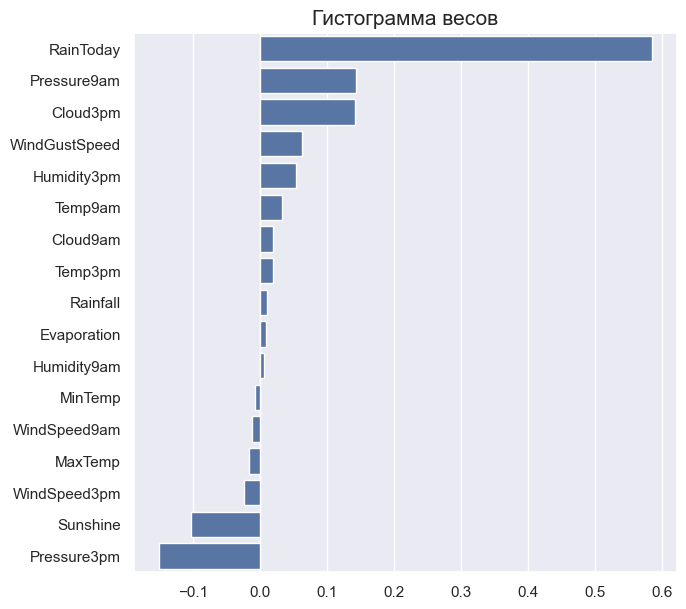

In [101]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значением соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [103]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### <font color='DarkOrange'> **Задание 5 [0.35 балла]** </font>

А сколько итераций потребовалось теперь? Как это связано с модельными примерами, на которых мы разбирали разные методы оптимизации?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>
 34

In [104]:
#Ваш ответ
model.n_iter_[0]

34

In [105]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3589
Train logloss = 0.3637
Test roc auc score = 0.8652
Train roc auc score = 0.8623


### <font color='DarkOrange'> **Задание 6 [0.7 балла]** </font>

Сравните получившееся качество с качеством до нормализации. Объясните, почему оно изменилось, хотя мы применяли линейную модель к линейно преобразованным признакам? Могло ли качество измениться в другую сторону?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Масштабирование признаков может значительно улучшить процесс оптимизации, так как градиентный спуск будет более эффективным на данных с однородным масштабом признаков. Это может способствовать более точному нахождению минимума функции потерь.

Без предварительного масштабирования признаки с большими абсолютными значениями могут оказывать непропорционально сильное влияние на веса модели, даже если они не являются более информативными.

Применяем линейную модель к линейно преобразованным признакам -> теоретически не должен влиять на предсказательную способность модели; на практике результаты могут варьироваться по нескольким причинам:

1. Численная стабильность и точность вычислений: Процесс оптимизации может быть подвержен ошибкам из-за недостаточной численной стабильности.

2. Локальные минимумы: Итеративный алгоритм градиентного спуска может сходиться к различным локальным минимумам в зависимости от начального масштаба признаков.

3. Потеря информации: Если данные неправильно масштабированы или если масштабирование нарушает важные порядковые отношения, это может негативно сказаться на качестве модели и привести к потере значимой информации о структуре данных.

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это alpha — коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины).

### <font color='DarkOrange'> **Задание 7 [0.35 балла]** </font>
Чем отличаются валидационная и тестовая выборки?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Валидационная выборка применяется для настройки гиперпараметров модели и оценки её качества в процессе разработки. В то время как тестовая выборка предназначена для финальной оценки производительности модели, после того как все настройки и выбор модели завершены.

Best C = 134.3399


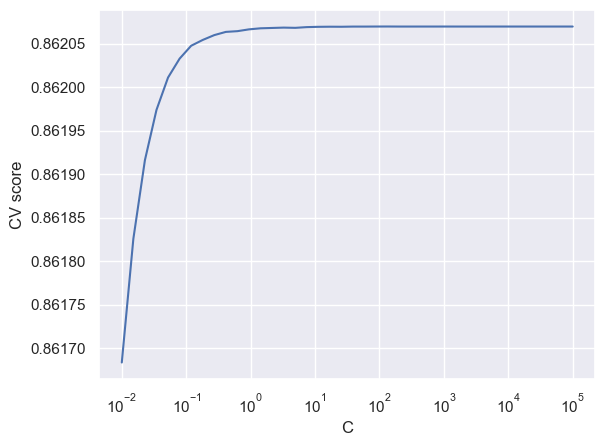

In [107]:
#ВНИМАНИЕ!!! Эта ячейка может считаться несколько минут, не пугайтесь)

from sklearn.model_selection import GridSearchCV

C = np.logspace(-2, 5, 40)
searcher = GridSearchCV(LogisticRegression(solver='lbfgs'), [{"C": C}], scoring="roc_auc", cv=10)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

print("Best C = %.4f" % best_C)

_ = plt.plot(C, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")
plt.show()

### <font color='DarkOrange'> **Задание 8 [0.7 балла]** </font>

Почему с ростом $C$ качество не падает, хотя модель должна недообучаться?

<font color='LightSteelBlue'>**Подсказка**</font> Внимательно прочитайте документацию к реализации логистической регрессии в sklearn

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Для логистической регрессии регуляризация осуществляется обратно пропорционально $C$.

### <font color='DarkOrange'> **Задание 9 [0.7 балла]** </font>

Почему мы не подбираем коэффициент регуляризации по обучающей выборке? По тестовой выборке?


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Подбор коэффициента регуляризации  на обучающей выборке может привести к переобучению. В этом случае модель будет настроена на конкретные данные обучения, что может негативно сказаться на её производительности при работе с новыми данными, поскольку коэффициент будет оптимизирован для минимизации ошибки на обучающем наборе, а не для улучшения обобщающих способностей модели.

Тестовая выборка предназначена для окончательной оценки модели. Если тестовая выборка используется для настройки гиперпараметров, включая коэффициент регуляризации, это может привести к утечке информации, что позволит модели подсмотреть тестовые данные. В результате это также приведет к переобучению, но уже на тестовых данных.

----

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся удобным классом Pipeline: обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод fit, а для тестовой — transform), а затем обучить/применить модель (для обучающей fit, а для тестовой — predict). Pipeline позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую. Однако, если ваши модели не укладываются в использование простых fit, transform и predict, то этот класс вам не подойдёт

In [108]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3589
Test roc auc score = 0.8652


### <font color='DarkOrange'> **Задание 10 [0.7 балла]** </font>
Почему качество не выросло?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

 $C$ = 1 качество модели не менялось значительно.

Как можем наблюдать по графику и показателям в коде ниже, метрики, такие как logloss и ROC AUC, могут иметь практические пределы, до которых они могут быть улучшены в данной задаче. Для простых моделей, таких как логистическая регрессия, может существовать верхний порог производительности, который ограничивается структурой данных и самим алгоритмом.

In [112]:
#Ваш ответ

model_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_1.fit(X_train_scaled, y_train)
y_pred = model_1.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model_1.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C без подбора:", model_1.C)

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model_2 = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model_2.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C:", model_2.named_steps['classification'].C)

Test logloss = 0.358871
Test roc auc score = 0.865173
Значение C без подбора: 1.0
Test logloss = 0.358871
Test roc auc score = 0.865175
Значение C: 134.33993325989016


Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую информацию о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [113]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

Для работы с категориальными признаками нужно их как-то закодировать числами. В базовой части мы воспользовались реализацией one-hot кодирования из библиотеки sklearn. Однако сегодня мы не будем пользоваться библиотечными методами:)

Если последующий код выполнятеся слишком медленно, то вероятно Вы реализовали MyOneHotEncoder без использования векторных операций из библиотеки numpy.

In [114]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', MyOneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3498
Test roc auc score = 0.8721


Качество немного выросло, если смотреть на ROC AUC! Можете даже сравнить с тем, что получилось в базовой части (должно быть одинаково)

Давайте попробуем счётчики.

Напомним, что счётчики преобразуют категориальный признак в три значения:

1. Доля counts объектов в обучающей выборке с таким же значением признака. $$\begin{align}
successes_j(c) = \frac{1}{n} \sum_{i=1}^n [f_j(x_i) = c]
\end{align}$$
2. Доля successes объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака. $$\begin{align}
counts_j(c) = \frac{1}{n * counts_j(c)} \sum_{i=1}^n[f_j(x_i) = c][y_i = +1].
\end{align}$$
2. Сглаженное отношение двух предыдущих величин: $$\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}$$

**Обратите внимание!** Если Ваша реализация счётчиков работает очень долго, то вероятнее всего, Вы плохо векторизовали код. Попробуйте использовать np.vectorize

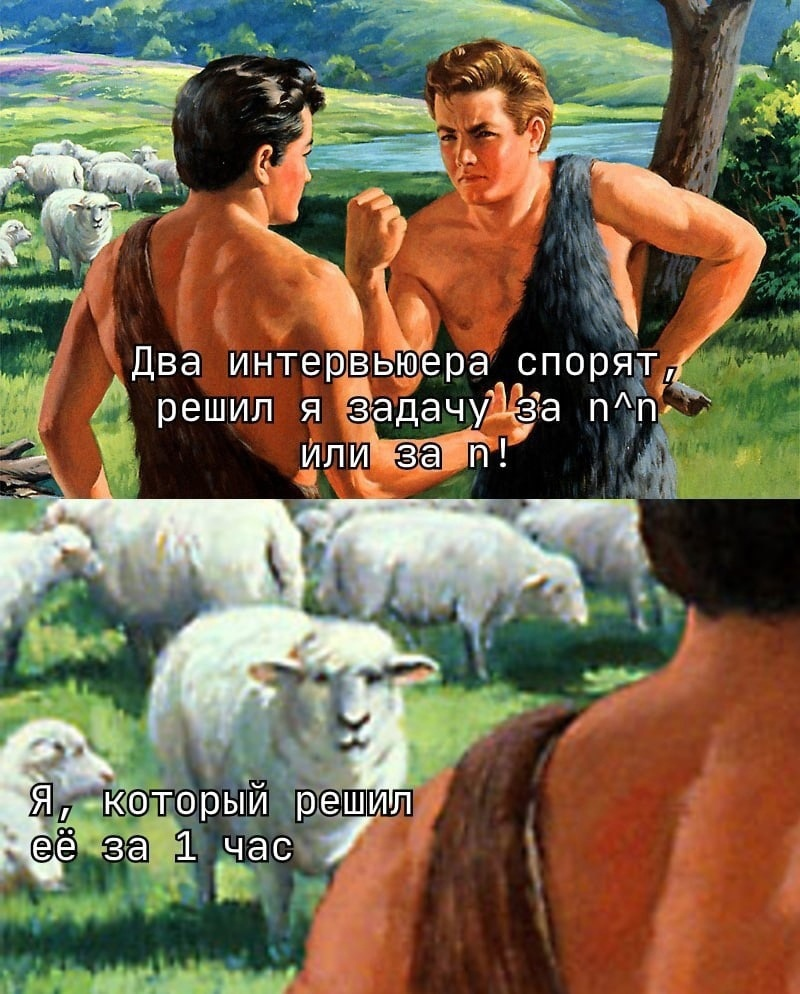

In [115]:
scal = StandardScaler()

enc_train = FoldCounters()
enc_train.fit(X_train[categorical], y_train)
X_train_counters = enc_train.transform(X_train[categorical])

enc_test = SimpleCounterEncoder()
enc_test.fit(X_train[categorical], y_train)
X_test_counters = enc_test.transform(X_test[categorical])

X_train_preprocessed = scal.fit_transform(np.hstack((X_train[numeric_features].to_numpy(), X_train_counters)))
X_test_preprocessed = scal.transform(np.hstack((X_test[numeric_features].to_numpy(), X_test_counters)))

model = LogisticRegression(solver="lbfgs")
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict_proba(X_test_preprocessed)[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3574
Test roc auc score = 0.8666


### <font color='DarkOrange'> **Задание 11 [0.7 балла]** </font>

Счётчики показывают худшее качество по AUC ROC, нежели OneHotEncoding. В чём же преимущества счётчиков?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>
Этот метод обладает рядом преимуществ по сравнению с OneHotEncoding:

1. Снижение размерности: OneHotEncoding может значительно увеличить количество признаков, особенно если у категориальных переменных много уровней. Счетчики создают лишь один признак для каждой категориальной переменной, что упрощает модель и ускоряет процесс её обучения.

2. Не эффективность хранения: OneHotEncoding приводит к формированию разреженных матриц, что может быть неэффективно с точки зрения вычислительных ресурсов. В отличие от этого, счетчики формируют плотный набор признаков, что делает их более удобными для работы.

3. Переобучение: OneHotEncoding может вызвать переобучение, если некоторые категории имеют очень малое количество наблюдений. Счетчики, в свою очередь, могут обеспечить лучшее обобщение, основываясь на статистике, связанной с целевой переменной.

**Выводы** Во второй части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужно нормализовать данные.
2.   Как работать с вещественными и категориальными признаками.
3.   Как интерпретировать результат обучения линейной модели, опираясь на описание обучающих данных
4.   Если есть библиотека, которая делает то, что Вам нужно, то почему бы ей не воспользоваться?)

-----------
<font color="white" style="opacity:0.2023"></font>